### Kehua Chu (UID: 806153163)

### Import Modules

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from simple_colors import *

### Problem 3

In [3]:
np.random.seed(123)

In [4]:
n_samples = 20
max_features = 5
sigma_values = [0.05, 0.3, 0.5, 0.8, 1]
n_simulations = 100

In [9]:
def generate_data(sigma, n_samples=20, n_features=25):
    np.random.seed(100)
    X = np.random.normal(0, 1, size=(n_samples, n_features))
    beta = np.array([0.5 + 0.5 * j / 25 for j in range(1, n_features + 1)])
    epsilon = np.random.normal(0, sigma, size=n_samples)
    y = X @ beta + epsilon
    return X, y

In [10]:
def calculate_mse(X_train, y_train, X_test, y_test):
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    train_mse = mean_squared_error(y_train, y_train_pred)
    
    y_test_pred = model.predict(X_test)
    test_mse = mean_squared_error(y_test, y_test_pred)
    
    return train_mse, test_mse

In [11]:
def monte_carlo_simulation(sigma):
    train_mse_results = []
    test_mse_results = []
    
    for _ in range(n_simulations):
        X, y = generate_data(sigma)
        test_errors = []
        train_errors = []
        
        for p in range(1, max_features + 1):
            X_train, X_test, y_train, y_test = train_test_split(X[:, :p], y, test_size=0.3, random_state=100)
            train_mse, test_mse = calculate_mse(X_train, y_train, X_test, y_test)
            
            train_errors.append(train_mse)
            test_errors.append(test_mse)
        
        train_mse_results.append(train_errors)
        test_mse_results.append(test_errors)
    
    return np.mean(train_mse_results, axis=0), np.mean(test_mse_results, axis=0)


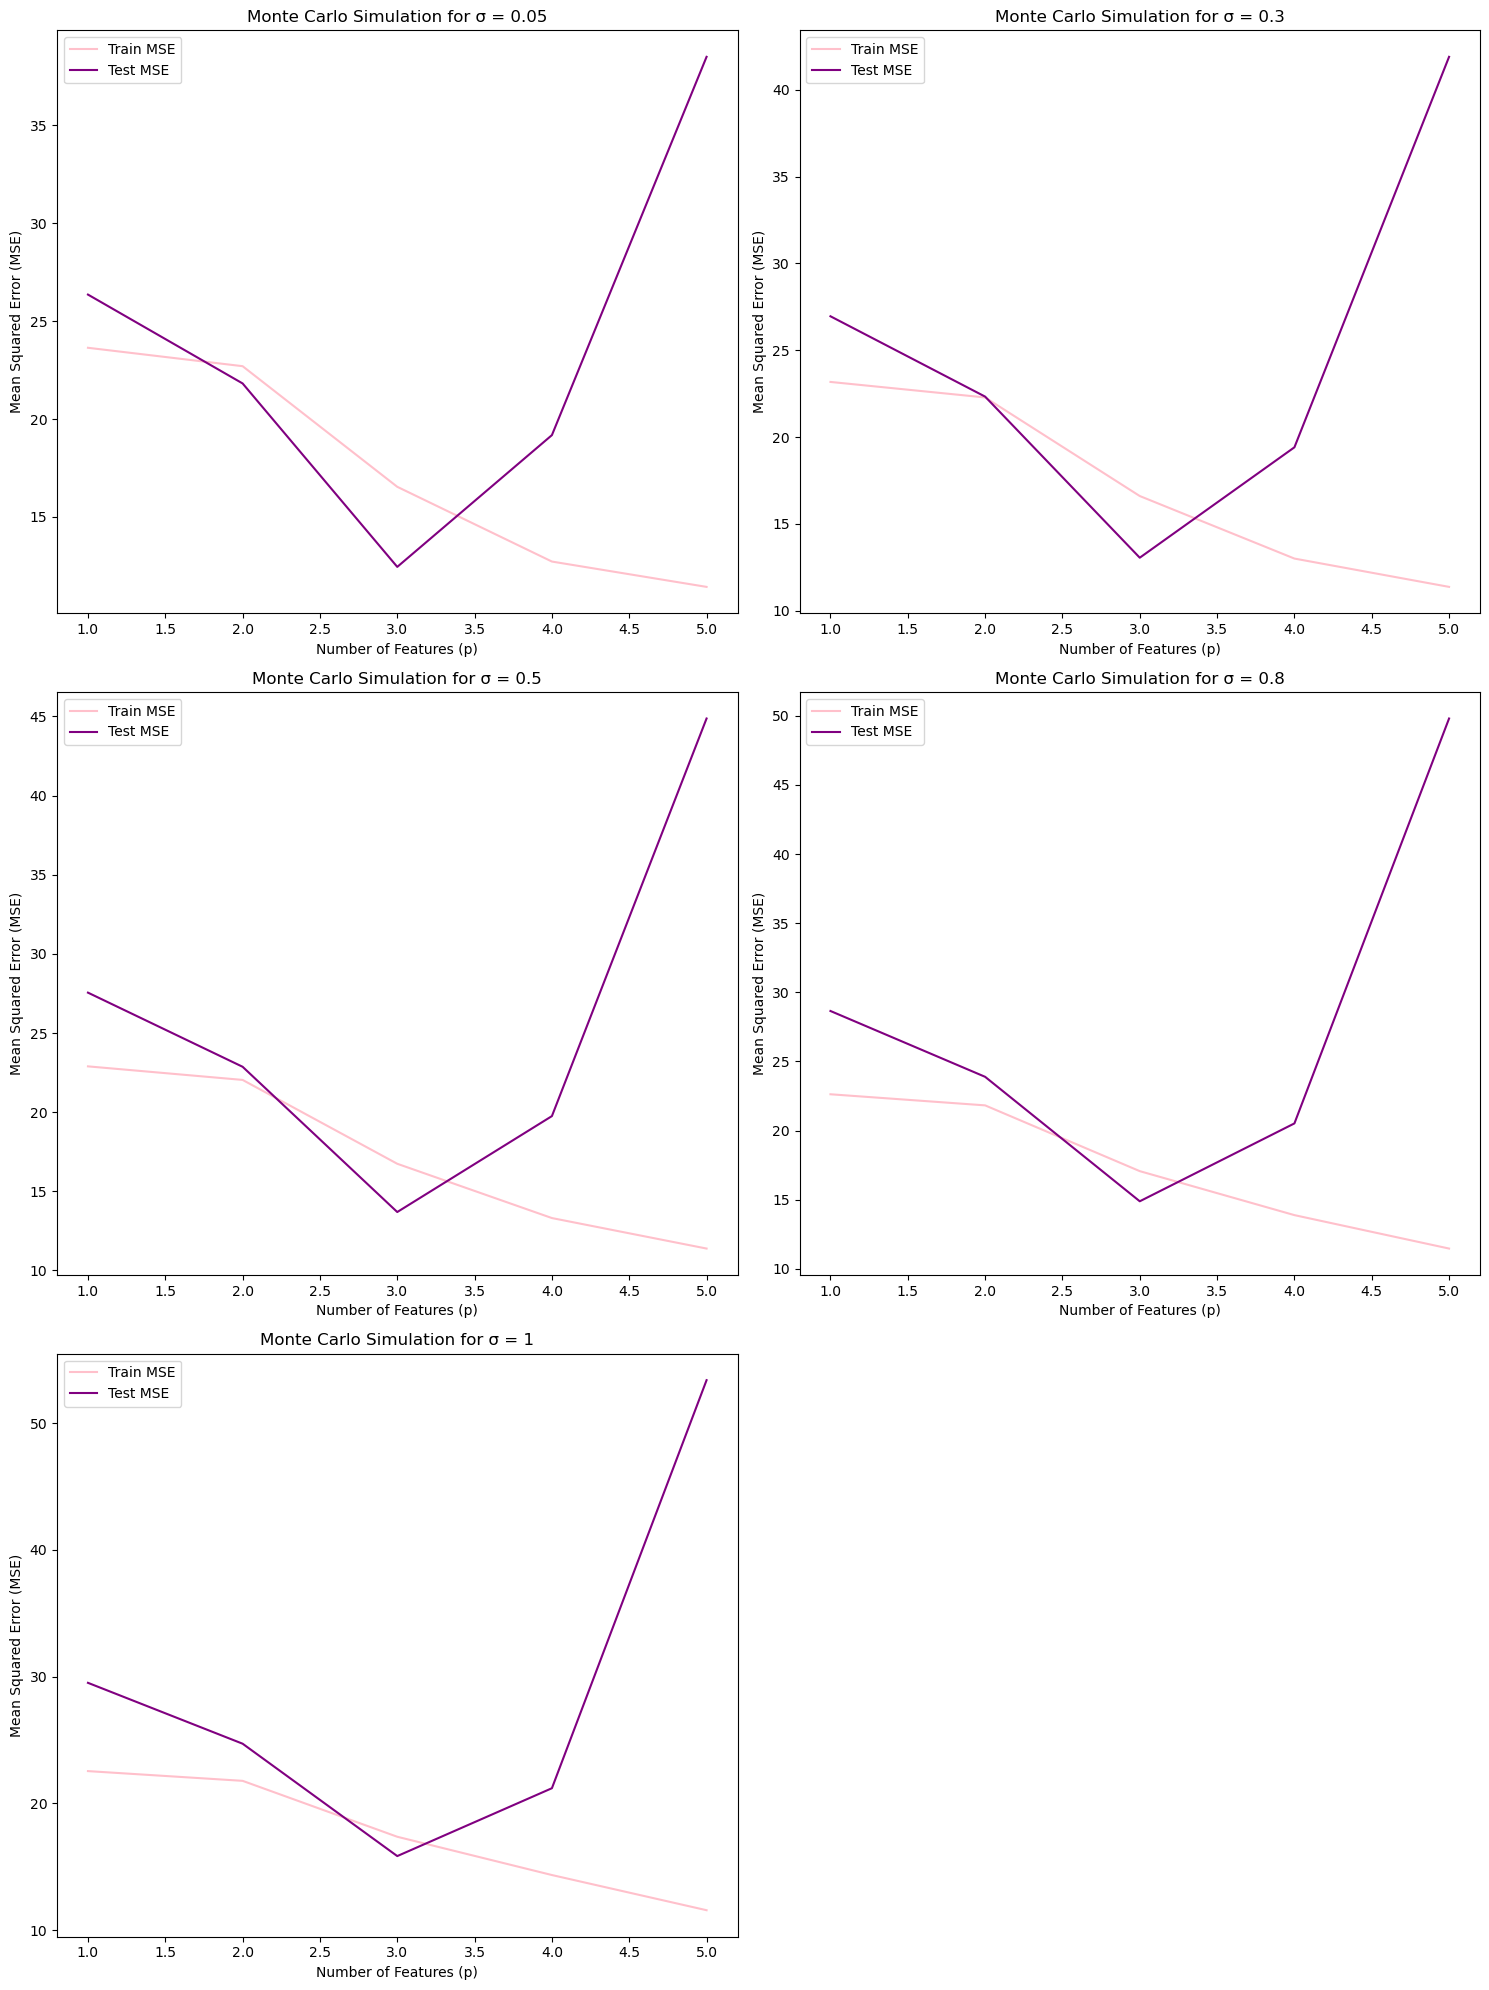

In [12]:
plt.figure(figsize=(15, 20))  

optimal_p_values = []

for sigma_index, sigma in enumerate(sigma_values):
    train_mse_avg, test_mse_avg = monte_carlo_simulation(sigma)
    
    optimal_p = np.argmin(test_mse_avg) + 1  
    optimal_p_values.append(optimal_p)
    
    plt.subplot(3, 2, sigma_index + 1)
    plt.plot(range(1, max_features + 1), train_mse_avg, label='Train MSE', color = 'pink')
    plt.plot(range(1, max_features + 1), test_mse_avg, label='Test MSE', color = 'purple')
    plt.title(f'Monte Carlo Simulation for σ = {sigma}')
    plt.xlabel('Number of Features (p)')
    plt.ylabel('Mean Squared Error (MSE)')
    plt.legend()

plt.tight_layout()  
plt.show()

#### What is the optimal p for each σ?

In [13]:
for sigma, optimal_p in zip(sigma_values, optimal_p_values):
    print(f'Optimal p for σ = {sigma}: {optimal_p}')

Optimal p for σ = 0.05: 3
Optimal p for σ = 0.3: 3
Optimal p for σ = 0.5: 3
Optimal p for σ = 0.8: 3
Optimal p for σ = 1: 3


#### Explain this relationship.

We could find that no matter the values of sigmas are, the optimal p in the U-curve stably remains 3, which minimizes the test MSE. It means that under the condition of various noise levels, add more features would not improve the model after p reaches 3 and could even result in overfitting problem. This greatly represents the trade-off of bias-variance mentioned in our lecture.

### Problem 4

#### (a) Set a random seed, and compute the LOOCV errors from fitting the following four models using least squares on n = 100 points; Also create a scatterplot of the data.

In [18]:
np.random.seed(10)

In [20]:
n = 100
x = np.random.normal(0, 1, n)
ep = np.random.normal(0, 1, n)
y = x - 2 * x**2 + ep

In [21]:
models = [LinearRegression(), LinearRegression(), LinearRegression(), LinearRegression()]

Average LOOCV MSE for Degree 1 is 9.3256
Average LOOCV MSE for Degree 2 is 1.1215
Average LOOCV MSE for Degree 3 is 1.1738
Average LOOCV MSE for Degree 4 is 2.2513


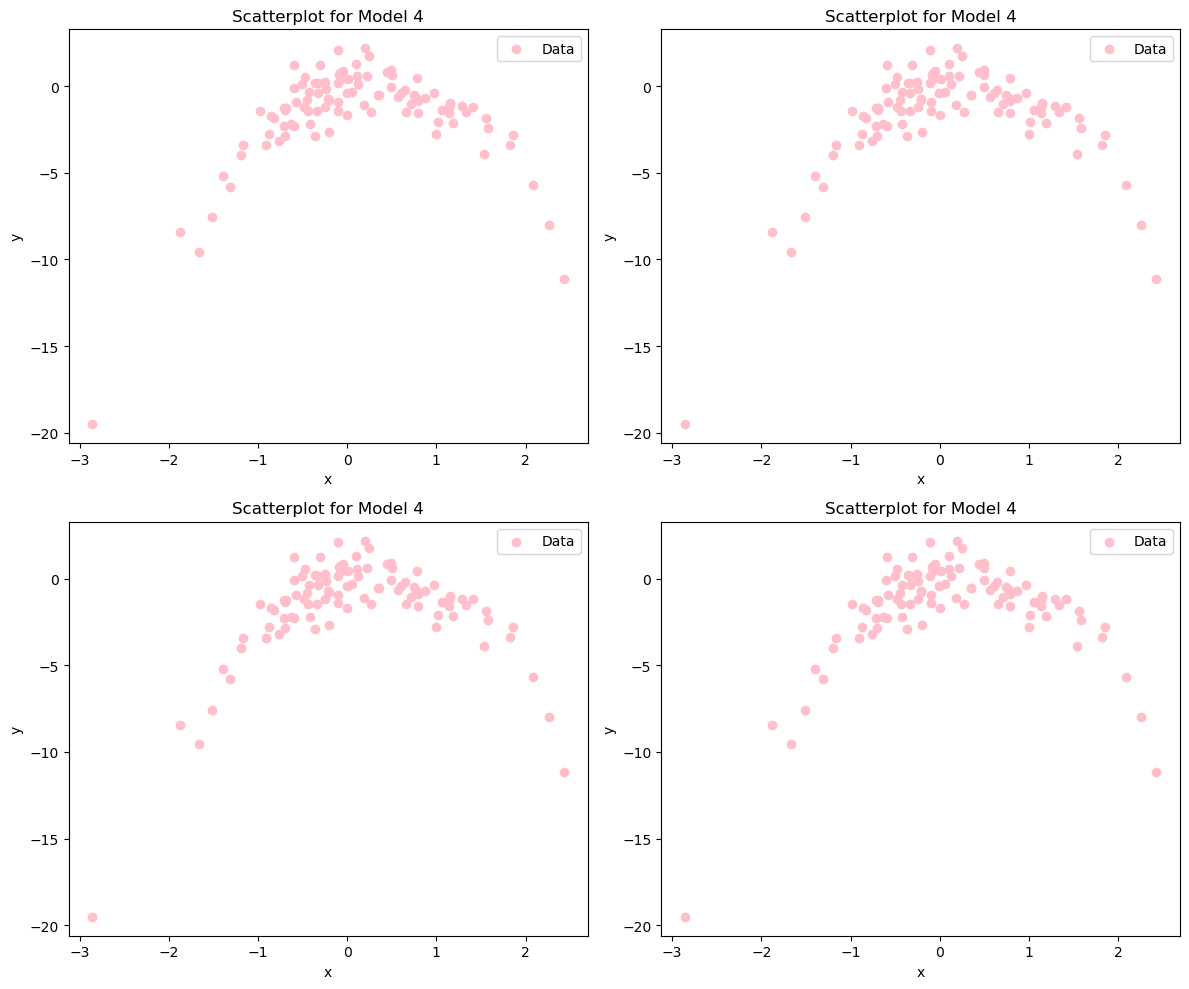

In [41]:
max_degrees = 4  
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs = axs.flatten()

loo = LeaveOneOut()

for degrees in range(1, max_degrees + 1):
    poly = PolynomialFeatures(degree=degrees)
    X_poly = poly.fit_transform(x.reshape(-1, 1))  # Reshape x to a column vector
    
    model = LinearRegression()
    mse_list = []
    
    for train_index, test_index in loo.split(X_poly):
        X_train, X_test = X_poly[train_index], X_poly[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        mse = mean_squared_error(y_test, y_pred)
        mse_list.append(mse)
    
    avg_mse = np.mean(mse_list)
    
    axs[degrees - 1].scatter(x, y, label='Data', color='pink')
    axs[degrees - 1].set_title(f'Scatterplot for Model {i+1}')
    axs[degrees - 1].set_xlabel('x')
    axs[degrees - 1].set_ylabel('y')
    axs[degrees - 1].legend()

    print(f'Average LOOCV MSE for Degree {degrees} is {avg_mse:.4f}')

plt.tight_layout()
plt.show()


#### (b) Repeat (a) using another random seed, and report your results. Are your results the same as what you got in (a)?

In [42]:
np.random.seed(5)

In [43]:
n = 100
x = np.random.normal(0, 1, n)
ep = np.random.normal(0, 1, n)
y = x - 2 * x**2 + ep

Average LOOCV MSE for Degree 1 is 9.3256
Average LOOCV MSE for Degree 2 is 1.1215
Average LOOCV MSE for Degree 3 is 1.1738
Average LOOCV MSE for Degree 4 is 2.2513


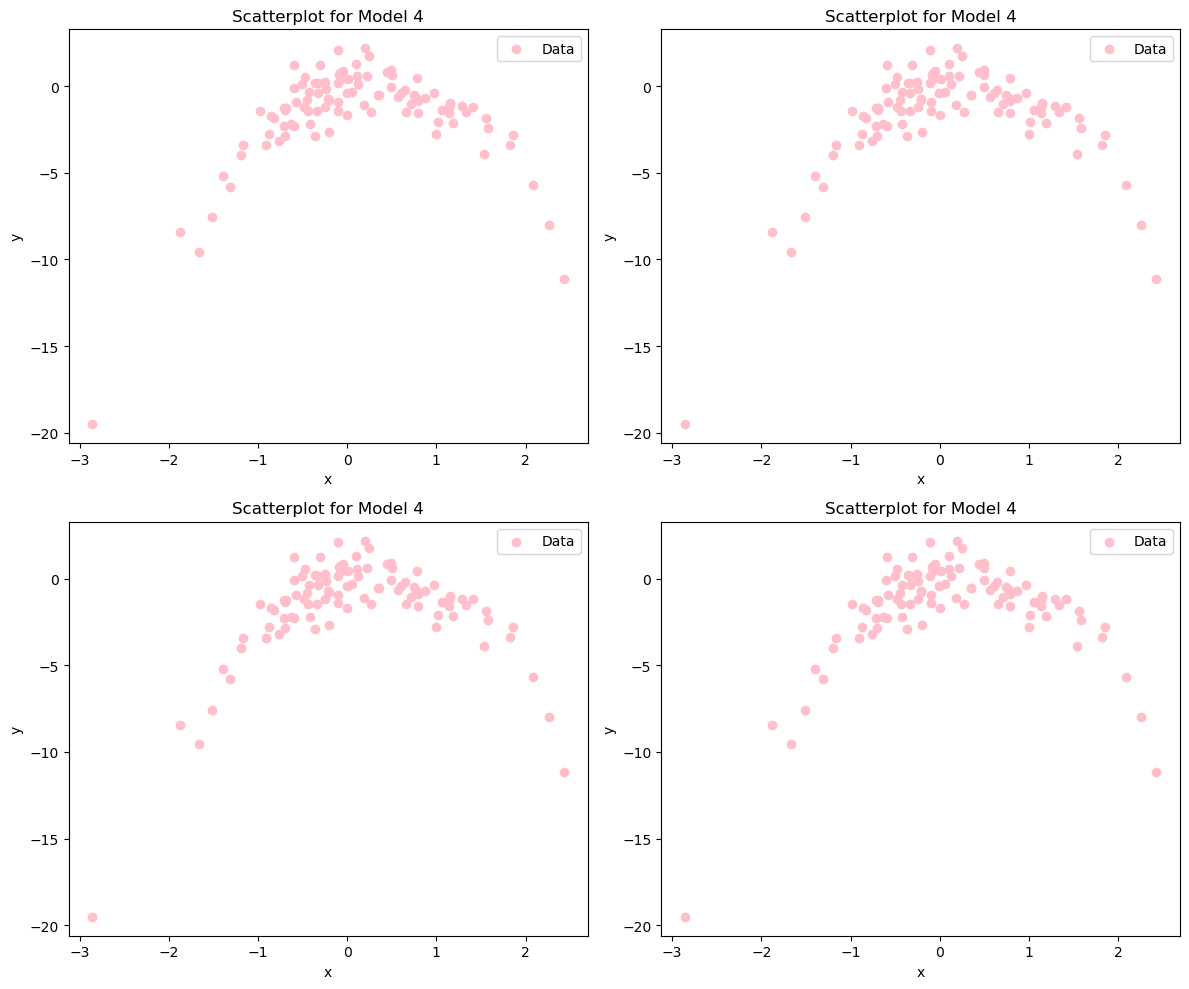

In [44]:
max_degrees = 4  
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs = axs.flatten()

loo = LeaveOneOut()

for degrees in range(1, max_degrees + 1):
    poly = PolynomialFeatures(degree=degrees)
    X_poly = poly.fit_transform(x.reshape(-1, 1))  # Reshape x to a column vector
    
    model = LinearRegression()
    mse_list = []
    
    for train_index, test_index in loo.split(X_poly):
        X_train, X_test = X_poly[train_index], X_poly[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        mse = mean_squared_error(y_test, y_pred)
        mse_list.append(mse)
    
    avg_mse = np.mean(mse_list)
    
    axs[degrees - 1].scatter(x, y, label='Data', color='pink')
    axs[degrees - 1].set_title(f'Scatterplot for Model {i+1}')
    axs[degrees - 1].set_xlabel('x')
    axs[degrees - 1].set_ylabel('y')
    axs[degrees - 1].legend()

    print(f'Average LOOCV MSE for Degree {degrees} is {avg_mse:.4f}')

plt.tight_layout()
plt.show()


After setting the seed to 5, the LOOCV errors from four models become 9.2356, 1.1215, 1.1738 and 2.2513 seperately. And the rough shape of scatterplots remains similar to the former plots where we set seed as 10.

#### (c) Which of the models in (a) had the smallest LOOCV error? Is this what you expected? Explain your answer.

Model 2 has generated the smallest LOOCV error in both (a) and (b).

The results are in line with my expectations because the true model is $y = x - 2x^2 + ε$, and its highest degree is second order. Model 2 also has a second-order term, so it generates the smallest LOOCV error, which is consistent with the true underlying structure of the data.

#### (d) Comment on the statistical significance of the coefficient estimates that results from fitting each of the models in (a) using least squares. Do these results agree with the conclusions drawn based on the cross-validation results?

In [57]:
model_1 = sm.OLS(y, sm.add_constant(x)).fit()
model_2 = sm.OLS(y, sm.add_constant(np.column_stack((x, x**2)))).fit()
model_3 = sm.OLS(y, sm.add_constant(np.column_stack((x, x**2, x**3)))).fit()
model_4 = sm.OLS(y, sm.add_constant(np.column_stack((x, x**2, x**3, x**4)))).fit()

print('\n')
print(blue("Model 1",['bold']))
print(model_1.summary())
print('\n')

print(blue("Model 2",['bold']))
print(model_2.summary())
print('\n')

print(blue("Model 3",['bold']))
print(model_3.summary())
print('\n')

print(blue("Model 4",['bold']))
print(model_4.summary())




Model 1
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     4.660
Date:                Tue, 16 Jan 2024   Prob (F-statistic):             0.0333
Time:                        23:39:10   Log-Likelihood:                -246.77
No. Observations:                 100   AIC:                             497.5
Df Residuals:                      98   BIC:                             502.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6926      0.290     -5.84

From results above we could see that in model 1, the coefficient of x1 is not significant, while the coefficent of x1 and x2 are always statistically sigificant with the p-value of 0 in model 2-4. Besides, in model 2-4, when keep adding x3 and x4, their coefficient doesn't show any statistical significance. Hence, we conclude that these findings agree with the conclusion drawn based on the LOOCV results,